# Modeling Reddit Comments:

### The NLP modeling process is broken down as follows:

Classifying Comments:
   - 1. Logistic Regression:
       - CountVectorizer
       - TF-IDF
   - 2. Naieve Bayes
       - CountVectorizer
       - TF-IDF
   - 3. SVM
       - CountVectorizer
       - TF-IDF
       
Hyperparameters are further defined under each section, below.

In [44]:
# Import Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from nltk.stem import WordNetLemmatizer

## 1. Classifying Submissions:

In [15]:
# Read in merged CSV:

df_comments = pd.read_csv('../data/merged_comments.csv')

In [16]:
# Define X and y:

X_comments = df_comments['body']
y_comments = df_comments['subreddit']

In [17]:
# Execute Train/Test Split on Submissions:

X_train, X_test, y_train, y_test = train_test_split(X_comments,
                                                    y_comments,
                                                    random_state=42)

In [18]:
# Define function to lemmatize text:

def split_into_lemmas(text):
    text = text.lower()
    lemmer = WordNetLemmatizer()
    return "".join([lemmer.lemmatize(word) for word in text])

# Code adapted from GA DSI Local Lesson: NLP

### 1A) Logistic Regression + CountVectorizer:

In [19]:
# NOTE: Fitting 720 models, can take 20+ minutes to run.

# Pipeline 1:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])
# Pipeline 1 parameters:
pipe1_params = {
    'cvec__max_features': [3000, 4000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':[None],
    'lr__C': np.linspace(.001, 3, 5),
    'lr__penalty': ['l1', 'l2']
}
# GridSearchCV1:
gs1 = GridSearchCV(pipe1,
                  param_grid=pipe1_params,
                  n_jobs=-1,
                  cv=5)
# Fit GridSearch to training data:
print('Fitting model. This could take 20 minutes. Might want to grab coffee...')
gs1.fit(X_train, 
       y_train)

# Score Model:
print('...models fit!')
print(f'Training score: {gs1.score(X_train, y_train)}')
print(f'Test score    : {gs1.score(X_test, y_test)}')
print(f'Best params   : {gs1.best_params_}')

Fitting model. This could take 20 minutes. Might want to grab coffee...
...models fit!
Training score: 0.8587550487051556
Test score    : 0.7947255880256593
Best params   : {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': None, 'cvec__stop_words': None, 'cvec__strip_accents': 'ascii', 'lr__C': 0.75075, 'lr__penalty': 'l2'}


In [62]:
#ROC AUC SCORE

SyntaxError: invalid syntax (<ipython-input-62-974ef18dc9cc>, line 1)

### 1B) Logistic Regression + TF-IDF:

In [20]:
# NOTE: Fitting 1080 models, can take 15+ minutes to run.

# Pipeline 2:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'liblinear'))
])
# Parameters:
pipe2_params = {
     'tvec__max_features': [1500, 3000, 5000],
     'tvec__ngram_range': [(1,1), (1,2)],
     'tvec__strip_accents': ['ascii', 'unicode', None],   
     #'tvec__preprocessor': [split_into_lemmas, None],
     'tvec__stop_words':['english', None],
     'lr__C': np.linspace(.001, 3, 5)
}
# GridSearchCV2:
gs2 = GridSearchCV(pipe2,
                  param_grid=pipe2_params, 
                  n_jobs=-1,
                  cv=5)
# Fit GridSearch to training data:
print('Fitting model. This could take 20+ minutes. Might want to grab coffee...')
gs2.fit(X_train, y_train)

# Score Model:
print('...models fit!')
print(f'Training score: {gs2.score(X_train, y_train)}')
print(f'Test score    : {gs2.score(X_test, y_test)}')
print(f'Best params   : {gs2.best_params_}')

Fitting model. This could take 20+ minutes. Might want to grab coffee...
...models fit!
Training score: 0.8635859665795518
Test score    : 0.8067236873366596
Best params   : {'lr__C': 3.0, 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None, 'tvec__strip_accents': 'ascii'}


### 1C) Multinomial Naive Bayes + CountVectorizer: 


In [11]:
# NOTE: Fitting 540 models, can take 15+ minutes to run.

# Pipeline 3:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])
# Parameters:
pipe3_params = {
    'cvec__max_features': [1000, 1500, 5000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    #'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':['english', None]
}
# GridSearchCV3:
gs3 = GridSearchCV(pipe3,
                  param_grid=pipe3_params,
                   n_jobs=-1,
                  cv=5)
# Fit GridSearch to training data:
print('Fitting model. This could take 20+ minutes. Might want to grab coffee...')
gs3.fit(X_train, y_train)

# Score Model:
print('...models fit!')
print(f'Training score: {gs3.score(X_train, y_train)}')
print(f'Test score    : {gs3.score(X_test, y_test)}')
print(f'Best params   : {gs3.best_params_}')

Fitting model. This could take 20+ minutes. Might want to grab coffee...
Modelfs fit!
Training score: 0.8167419022729072
Test score    : 0.8001900688999762
Best params   : {'cvec__max_features': 5000, 'cvec__ngram_range': (1, 1), 'cvec__preprocessor': None, 'cvec__stop_words': None, 'cvec__strip_accents': 'ascii'}


### 1D) Multinomial Naive Bayes + TF-IDF:

In [12]:
# NOTE: Fitting 540 models, can take 15+ minutes to run.

# Pipeline 4:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])
# Parameters:
pipe4_params = {
    'tvec__max_features': [1000, 1500, 3000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],
    'tvec__strip_accents': ['ascii', 'unicode', None],   
    #'tvec__preprocessor': [split_into_lemmas, None],
    'tvec__stop_words':['english', None]
}
# GridSearchCV4:
gs4 = GridSearchCV(pipe4,
                  param_grid=pipe4_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 20+ minutes. Might want to grab coffee...')
gs4.fit(X_train, y_train)

# Score Model:
print('...models fit!')
print(f'Training score: {gs4.score(X_train, y_train)}')
print(f'Test score    : {gs4.score(X_test, y_test)}')
print(f'Best params   : {gs4.best_params_}')

Fitting models. This could take 20+ minutes. Might want to grab coffee...
Models fit!
Training score: 0.811831789023521
Test score    : 0.7936564504632929
Best params   : {'tvec__max_features': 3000, 'tvec__ngram_range': (1, 1), 'tvec__preprocessor': None, 'tvec__stop_words': None, 'tvec__strip_accents': 'ascii'}


### 1D) Support Vector Machine/Classifier (SVC) + Count Vecotrizer:

In [21]:
# NOTE: Fitting 540 models, can take 60+ minutes to run.

# Pipeline 5:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])
# Parameters:
pipe5_params = {
    'cvec__max_features': [3000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'cvec__ngram_range': [(1,1), (2,2)],
    'cvec__strip_accents': ['ascii', 'unicode', None],   
    #'cvec__preprocessor': [split_into_lemmas, None],
    'cvec__stop_words':[None],
    'svc__degree': [2]
}
# GridSearchCV5:
gs5 = GridSearchCV(pipe5,
                  param_grid=pipe5_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 60+ minutes. Might want to grab coffee...')
gs5.fit(X_train, y_train)  

# Score Model:
print('...models fit!')
print(f'Training score: {gs5.score(X_train, y_train)}')
print(f'Test score    : {gs5.score(X_test, y_test)}')
print(f'Best params   : {gs5.best_params_}')

Fitting models. This could take 60+ minutes. Might want to grab coffee...
...models fit!
Training score: 0.828383622396452
Test score    : 0.7668092183416488
Best params   : {'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'cvec__strip_accents': 'unicode', 'svc__degree': 2}


### 1E) Support Vector Machine/Classifier (SVC) + TF-IDF:

In [22]:
# NOTE: Fitting 540 models, can take 15+ minutes to run.

# Pipeline 6:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])
# Parameters:
pipe6_params = {
    'tvec__max_features': [3000],  # After increasing max features past 3,000, overfitting became an issue. 
                                              # Training scores would increase but Test scores remained at around .89
    'tvec__ngram_range': [(1,1), (2,2)],
    'tvec__strip_accents': ['ascii', 'unicode', None],   
    #'tvec__preprocessor': [split_into_lemmas, None],
    'tvec__stop_words':['english', None],
    'svc__degree': [2]
}
# GridSearchCV6:
gs6 = GridSearchCV(pipe6,
                  param_grid=pipe6_params,
                  n_jobs=-1, 
                  cv=5)
# Fit GridSearch to training data:
print('Fitting models. This could take 20+ minutes. Might want to grab coffee...')
gs6.fit(X_train, y_train)  

# Score Model:
print('...models fit!')
print(f'Training score: {gs6.score(X_train, y_train)}')
print(f'Test score    : {gs6.score(X_test, y_test)}')
print(f'Best params   : {gs6.best_params_}')

Fitting models. This could take 20+ minutes. Might want to grab coffee...
...models fit!
Training score: 0.9510968559436129
Test score    : 0.8032786885245902
Best params   : {'svc__degree': 2, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None, 'tvec__strip_accents': 'ascii'}


## Model Evaluation:

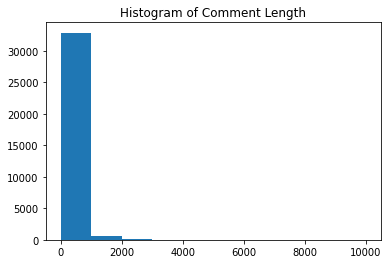

In [26]:
 # Length of each Comment in Characters:
lengths_of_posts = [len(each) for each in X_comments]
plt.hist(lengths_of_posts)
plt.title('Histogram of Comment Length');

In [28]:
# Calculate ROC AUC

def roc(probas, true, step=0.01):

    probas = probas[:,1]  
    true = true.values    
    assert(len(probas) == len(true)) 
    
    TPRs = [] 
    FPRs = [] 
    
    for i in np.arange(0.0,1.0,step): 
        preds_class = probas > i 
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): 

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) 
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();
    
# Code adapted from GA-DC-DSI Lab 4.02

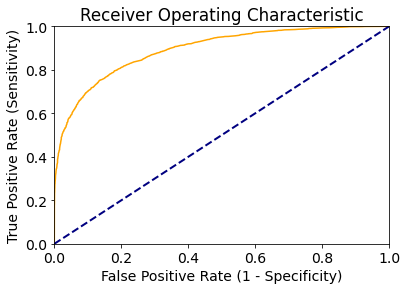

In [29]:
probabilities = gs2.predict_proba(X_test)

roc(probas = probabilities, true = y_test, step=0.001);   

In [31]:
# Calculate predictions for AUC score

preds=gs2.predict(X_test)
preds.shape

(8418,)

In [32]:
# AUC SCORE:
auc = roc_auc_score(y_test, preds)
auc

0.8066560725762928

In [34]:
# Generate Coeffs mapped to words:

coefs = gs2.best_estimator_.named_steps.lr.coef_  

log_coefs = pd.DataFrame(gs2.best_estimator_.named_steps.lr.coef_ , 
                        columns=gs2.best_estimator_.named_steps.tvec.get_feature_names())

log_coefs

,000,01,02,020,03,04,05,06,07,08,...,youtube,youve,yt,yup,zealand,zero,zika,zinc,zoom,zoonotic
0,-0.794506,-0.055876,-0.055957,1.922747,-0.164186,1.867616,0.503959,-0.267817,-0.760215,-0.174107,...,-1.997243,-0.325166,-0.403717,-0.598703,-0.379148,0.308937,0.170332,0.67545,-1.453533,0.918517


In [40]:
top10_coef = log_coefs.T.sort_values(0, ascending=False).head(10)
top10_coef

,0
circumcision,9.814152
circumcised,9.136428
foreskin,6.781892
bats,6.641771
penis,6.560423
study,5.747704
quantum,5.587275
science,5.326827
coal,5.092386
wife,5.060684


In [41]:
bottom10_coef = log_coefs.T.sort_values(0, ascending=False).tail(10)
bottom10_coef

,0
toilet,-3.918498
fake,-3.954755
jesus,-4.194364
martial,-4.194940
adrenochrome,-4.275525
epstein,-4.446575
lol,-5.194083
shit,-6.004640
conspiracy,-8.401395
5g,-8.436728


In [42]:
# Append Data:

df = bottom10_coef.append(top10_coef)
df = pd.DataFrame(df)
df

,0
toilet,-3.918498
fake,-3.954755
jesus,-4.194364
martial,-4.194940
adrenochrome,-4.275525
epstein,-4.446575
lol,-5.194083
shit,-6.004640
conspiracy,-8.401395
5g,-8.436728


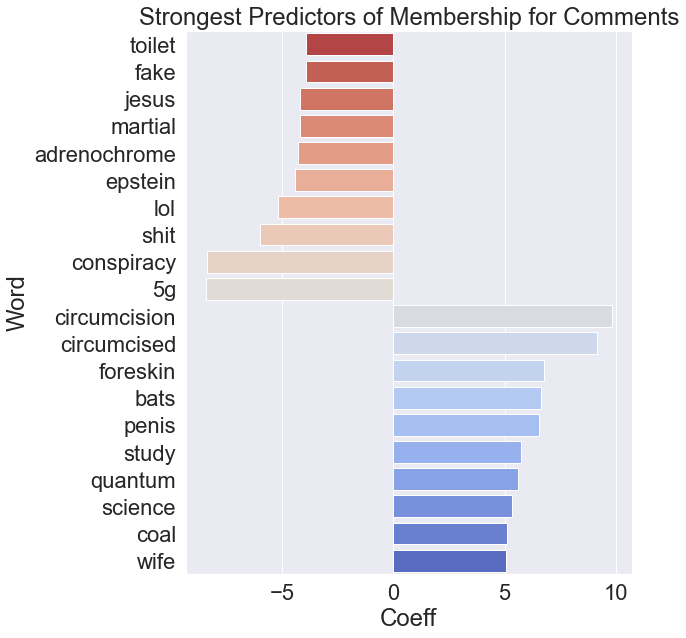

In [76]:
# Generate plot of strongest predictors of membership on coefficient:

sns.set(font_scale=2)
plt.figure(figsize=(8, 10))
ax4 = sns.barplot(data=df, 
                  x=0, 
                  y = df.index,
                
                  palette = 'coolwarm_r',
                 )
ax4.set(xlabel='Coeff', ylabel='Word', title='Strongest Predictors of Membership for Comments')
plt.show()